<hr style="height:4px;border:none;color:#333;background-color:#333;" />

# Analysis of Orange Juice Purchase Behavior
## Jaleel Walter Henry Savoy
07/10/2019
<hr style="height:2px;border:none;color:#333;background-color:#333;" />

<h2><center>Abstract</center></h2>
<summary><center>
    Often, companies that sell goods directly to consumers use a considerable amount of resources to better understand those consumers' purchasing patterns and behaviors, especially in regards to choosing between brands. Being able to  predict purchasing decisions before they occur offers clear strategic value to sellers of consumer goods. In this report, non-parametric classification models are explored, using data related to consumer and product sales characteristics, to predict purchase decisions involving two orange juice brands, Minute Maid and Citrus Hill. The results of the report identify three models that accurately predict (>80% classification accuracy on test observation) purchases of the two brands.
    </center></summary>

## Introduction
Researching consumer purchasing behavior is a task where many firms dedicate substantial amounts of resources to better understand. In the orange juice market, there is a myriad of factors that drive purchases of one brand over available alternatives. For consumers without strong preferences nor brand loyalties, their purchasing decisions may be primarily driven by small differences in price and/or discounts offered; in contrast, for consumers with strong preferences and brand loyalties, it may require larger differences in price and/or discounts. 

There clearly exists a value in being able to predict a consumers purchase. The objective of this report is to build a classification model that accurately predicts the brand of orange juice that was purchased by customers given a set of product and consumer characteristics used as the predictor features. The model should be parsimonious and produce accurate results by generalizing well on new observations.

## Data Source
For this report, the data analyzed will be the OJ dataset that comes built into the ISLR library in R, which has already been cleaned. The OJ dataset contains data on the sales of two orange juice brands, Citrus Hill and Minute Maid. There are 1070 observations and 18 variables; 17 of the variables are potential predictor features and one of the variables, Purchase, is the binary response. 

Of the 18 variables, six are of the factor data type and twelve are of the numeric data type. 

Of the total 1070 observations, 800 observations will randomly be selected from training and the remaining 270 will be held-out and used for testing.

#### Data Set Variables
Variable | Description | Data Type
---- | :---: | ---- |
Purchase | Either Minute Maid or Citrus Hill | Factor |
WeekofPurchase | Week the purchase was made | numeric |
StoreID | Store Identifier | factor |
PriceCH | Price Charged for Citrus Hill | numeric |
PriceMM | Price Charged for Minute Maid | numeric |
DiscCH | Discount for Citrus Hill | numeric |
DiscMM | Discount for Minute Maid | numeric |
SpecialCH | Indicates Special on Citrus Hill | factor |
SpecialMM | Indicates Special on Minute Maid | factor |
LoyalCH | Consumer Brand Loyalty for Citrus Hill | numeric |
SalePriceMM | Sales Price for Minute Maid | numeric |
SalePriceCH | Sales Price for Citrus Hill | numeric |
PriceDiff | Price of Minute Maid less Price of Citrus Hill | numeric |
Store7 | Indicates Whether the sales from Store 7 | factor |
PctDiscMM | Percentage Discount for Minute Maid | numeric |
PctDiscCH | Percentage Discount for Citrus Hill | numeric |
ListPriceDiff | List Price of Minute Maid less list price of Citrus Hill | numeric |
STORE | Indicates the Store of the Sale | factor |
Special_Interaction | Interaction between SpecialCH and SpecialMM | numeric |
DiscDiff | Discount for Minute Maid less Discount for Citrus Hill | numeric |
PctDiscDiff | Percent Discount for Minute Maid less Percent Discount for Citrus Hill | numeric |

The SpecialCH, SpecialMM, StoreID, and STORE features were converted to the factor data type from the numeric data type.

**Note**: Special_Interaction, DiscDiff, and PctDiscDiff are handcrafted features. This is discussed later in the report.

## Preliminary Data Exploration
Before performing building any models or performing any classifications, the data was explored to look for 

### Data Summaries
The data summary table and the figures are located in the appendix.

Looking at the data summary table, which displays the five-number summary statistics for each column, and the plotted variables provides some important insights into the data:
* Observing **Figure 1** and **Figure 2** it is clear that Minute Maid typically has a higher charged price, and also has a larger standard deviation, when compared to Citrus Hill 
* Observing **Figure 3** and **Figure 4** it is clear that Minute Maid has a larger average discount, a larger standard deviation, and a heavier right-tail, when compared to Citrus Hill
* Observing **Figure 6** it is clear that the store where the overwhelming majority of purchases were made was store 7 and most of those sells were for Citrus Hill
* In **Figure 5** it can be seen that 50% of consumers have brand loyalty for Citrus Hill of at least 60%, with a mean of ~56.58  
* It appears that the STORE and StoreID variables contain the same information, this is supported by **Figure 6** and **Figure 7**
* ~61.03% of the purchases were for Citrus Hill, with ~38.97% for Minute Maid, this is supported by **Figure 8**
* The data was collected over a 51 week period, with 50% of purchases coming after 30 weeks
* Citrus Hill has specials ~14.77% of the time and Minute Maid has special ~16.17%

### Principal Components Analysis
As part of the data exploration phase of this report, principal components analysis was performed, on the numeric features, to find insightful relationships between the various product and consumer characteristics. Before performing the principal components analysis, the features were scaled and centered.

#### Importance of Principal Components
Observing the summary of the principal components analysis, it is evident that the first 3 principal components, out of the 12 total, cumulatively explain 78.94% of the variance in the data and the first six components cumulatively explain nearly all of the variance in the data; the first six principal components explain ~99.98% of the variance and the first eight components explain 100% of the variance in the data. The results imply that between four to six features offer little or no information while contributing additional noise to the data. These results are shown graphically represented in **Figure 11** and **Figure 12**.

#### Grouping of Features
**Figure 13** shows the biplot of the analysis, which plots the data and the loading vectors in two dimensions using the first two principal components; the loading vectors are used to identify grouping of the features. 

Features that strongly influence the first principal component are SalePriceMM, PriceDiff, PctDiscMM, and DiscMM. SalesPriceMM and PriceDiff (the price of Minute Maid minus the price of Citrus Hill) have large negative loadings on the first princpal component, while PctDiscMM and DiscMM have large positive loadings; these results indicate that the first principal component focuses on the relative expensiveness of Minute Maid in comparison to Citrus Hill.

Features that strongly influence the second principal component are SalePriceCH, PctDiscCH, and DiscCH. SalePriceCH has a large positive loading on the second principal component, while PctDiscCH and DiscCH have large negative loadings; these results indicate that the second principal component, in contrast to the first component, focuses on the relative expensiveness of Citrus Hill in comparison to Minute Maid.

Some notable pairings of the features:
* PctDiscCH and DiscCH, this is expected since they are related features
* PctDiscMM and DiscMM, much like the previous pairing, this is expected as both features are related
* PriceMM, PriceCH, and LoyalCH

## Feature Engineering
Through the process of exploring the data, it was decided that a few hand-crafted variables may be useful in helping the model classify the observation accurately. The hand-engineered features are: SpecialsInteraction, which is the interaction between the SpecialMM and SpecialCH variables; and PctDiscDiff, which is the percent discount on Minute Maid minus the percent discount on Citrus Hill.

## Modeling
As mentioned earlier, in this report, the data was split into training and testing samples. Additionally, for the classifiers, they were tuned using partitions of the training sample in a 10-fold cross-validation procedure to choose the optimal model regularization parameter value.

### Support Vector Classifier
The first modeling approach attempted was the support vector classifier, which was implemented using a support vector machine with a linear kernel. This statistical learning method that is an extension of the maximal margin classifier that attempts to find a linear hyperplane to separate the classes, while allowing a proportion of the observation to violate the margins of the hyperplane that separates the classes.  
#### Initial Model
The initial support vector classifier model used a value of 0.01 for the cost of constraints violation parameter; this value for the regularization parameter is relatively small. The predictors for the model were the first six principal components, the interaction between the specials on the brands, and the difference between the discount on Minute Maid and the discount on Citrus Hill. The model had 438 support vectors, split nearly evenly between the classes, so more than 50% of the training set observations violated the margins and affected the hyperplane. The model correctly classified ~83.88% of the training observations and 80% of the test observations.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 440 | 58 
MM | 77 | 225

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 123 | 32 
MM | 22 | 93


#### Tuning Model for Optimal Cost Parameter Value
To find the optimal cost of constraints violation parameter value, the 10-fold cross-validation sampling method was performed using a list of candidate cost values in the range of 0.01 to 10. The chosen cost value was 0.041; which achieved the error rate, 16.75%, during cross-validation. 

This model achieves an 83.5% correct classification rate on the training data and an ~78.15% correct classification rate on the testing data; so the data had a misclassification rate of ~16.5% on training data and ~21.85% on the test data. This new, tuned model performs noticeably better on the test observations, but it still has a lot of room for improvement.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 436 | 62 
MM | 70 | 232

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 120 | 35 
MM | 24 | 91

### Support Vector Machine with a Radial Kernel
The next modeling approach attempted was the support vector machine using a radial kernel. This statistical learning method attempts to find a non-linear hyperplane to separate the classes while allowing a proportion of the observation to violate the margins of the hyperplane that separates the classes.  

#### Initial Model
The initial support vector machine, with a radial kernel, model used a value of 0.01 for the cost of constraints violation parameter; this value for the regularization parameter is relatively small. The predictors for the model were: SalesPriceCH, SalesPriceMM, PriceDiff, PctDiscMM, WeekOfPurchase, and LoyalCH; the predictors were chosen after examining **Figure 13** for impactful features. The model had 606 support vectors, split nearly evenly between the classes, so more than 75% of the training set observations violated the margins and affected the hyperplane. The model correctly classified ~62.3% of the training observations and ~57.41% of the test observations, which is misleading because it never predicted the Minute Maid purchase class on either data subset.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 498 | 0 
MM | 302 | 0

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 155 | 0 
MM | 115 | 0

#### Tuning Model for Optimal Cost Parameter Value
To find the optimal cost of constraints violation parameter value, the 10-fold cross-validation sampling method was performed using a list of candidate cost values in the range of 0.01 to 10. The chosen cost value was 0.5; which achieved the error rate, 16.5%, during cross-validation. 

This model achieves an ~84.63% correct classification rate on the training data and an ~81.48% correct classification rate on the testing data; so the data had a misclassification rate of ~15.37% on training data and ~18.52% on the test data.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 449 | 49 
MM | 74 | 228

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 138 | 17 
MM | 33 | 82

### Support Vector Machine with a Polynomial Kernel
The next model is another support vector machine, but it will use a polynomial kernel, as opposed to a radial kernel used in the previous two models.

#### Initial Model
This support vector machine is exactly like the previous two models other than the kernel chosen, polynomial, and the degree parameter value of 2. The model had 606 support vectors, split nearly evenly between the classes, so more than 75% of the training set observations violated the margins and affected the hyperplane. The model correctly classified ~62.3% of the training observations and ~57.41% of the test observations, which is misleading because it never predicted the Minute Maid purchase class on either data subset.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 498 | 0 
MM | 302 | 0

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 155 | 0 
MM | 115 | 0

#### Tuning Model for Optimal Cost Parameter Value
To find the optimal cost of constraints violation parameter value, the 10-fold cross-validation sampling method was performed using a list of candidate cost values in the range of 0.01 to 10. The chosen cost value was 6.75; which achieved the error rate, ~17.38%, during cross-validation. 

This model achieves an 84.5% correct classification rate on the training data and an ~82.22% correct classification rate on the testing data; so the data had a misclassification rate of ~15.5% on training data and ~17.78% on the test data.

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- | 
CH | 456 | 42 
MM | 82 | 220

Actual Purchase | Predicted CH | Predicted MM
--- | --- | --- |
CH | 141 | 14 
MM | 34 | 81

## Results Evaluation
Of the three models trained on using a regularization parameter value of 0.01, only the support vector classifier could be considered practically useful. The other two models, support vector machines, merely predicted a single class for every observation, so, regardless of their actual error rate, they lacked value for predicting purchases between the two orange brands.

Of the three models that were tuned using the cross-validation sampling method to find the optimal regularization parameter values, both support vector machines achieved similar performance on the test data. Surprisingly, the support vector classifier had a noticeable increase in its error rate after being tuned to find the optimal regularization parameter value.

Overall, the top three models, in descending order of performance on the test data, are: the tuned support vector machine with a polynomial kernel and a regularization parameter value of 6.75, the tuned support vector machine with a radial kernel and a regularization parameter value of 0.5 and a degree parameter value of 2, and the initial support vector classifier with a regularization parameter of 0.01.

## Conclusion
Three models were identified that achieved fair performance in regards to predicting purchases between the two orange brands, each of which serves as a solution to the research problem. Despite finding three suitable solutions, there is room for improvement. The data had very limited data on the consumer characteristics; it seems intuitive that knowing more about the consumers' purchasing behaviors or their demographic characteristics would help improve the models' prediction accuracies.

## Citations
David Meyer, Evgenia Dimitriadou, Kurt Hornik, Andreas Weingessel and
  Friedrich Leisch (2019). e1071: Misc Functions of the Department of
  Statistics, Probability Theory Group (Formerly: E1071), TU Wien. R
  package version 1.7-1. https://CRAN.R-project.org/package=e1071
  
Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
  (2017). ISLR: Data for an Introduction to Statistical Learning with
  Applications in R. R package version 1.2.
  https://CRAN.R-project.org/package=ISLR

Hadley Wickham (2017). tidyverse: Easily Install and Load the
  'Tidyverse'. R package version 1.2.1.
  https://CRAN.R-project.org/package=tidyverse
  
Venables, W. N. & Ripley, B. D. (2002) Modern Applied Statistics with
  S. Fourth Edition. Springer, New York. ISBN 0-387-95457-0
  
Yuan Tang, Masaaki Horikoshi, and Wenxuan Li. "ggfortify: Unified
  Interface to Visualize Statistical Result of Popular R Packages." The
  R Journal 8.2 (2016): 478-489.

## Appendix

In [2]:
###################################################################
# Load Data
###################################################################
## load relevant libraries
suppressPackageStartupMessages(library(ISLR, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(caret, warn.conflicts=FALSE))

## sSet seed for reproducibility
set.seed(123321)

## load the data
data <- OJ

## display columns
(names(data))

## inputs and label
label <- c('Purchase')
inputs <- c('WeekofPurchase', 'StoreID', 'PriceCH',
          'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
          'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
          'PctDiscCH', 'ListPriceDiff', 'STORE')

## numeric predictors
numeric_cols <- c('WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH',
                  'DiscMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH',
                  'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff')

## display column data types
table(sapply (data, class))
data$StoreID <- as.factor(data$StoreID)
data$STORE <- as.factor(data$STORE)
data$SpecialCH <- as.factor(data$SpecialCH)
data$SpecialMM <- as.factor(data$SpecialMM)
table(sapply (data, class))

## Data set dimensions
(dim(data))

## preview first 5 and last 5 observations
head(data)
tail(data)

## determine the training and testing indices
training <- sample(nrow(data), 800)
# training <- createDataPartition(data$Purchase, p = 0.747,
#                                       list = FALSE)
train.data <- data[training,]
test.data <- data[-training,]

[1] "Purchase"       "WeekofPurchase" "StoreID"        "PriceCH"       
 [5] "PriceMM"        "DiscCH"         "DiscMM"         "SpecialCH"     
 [9] "SpecialMM"      "LoyalCH"        "SalePriceMM"    "SalePriceCH"   
[13] "PriceDiff"      "Store7"         "PctDiscMM"      "PctDiscCH"     
[17] "ListPriceDiff"  "STORE"


 factor numeric 
      2      16 


 factor numeric 
      6      12 

[1] 1070   18

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1065,CH,251,7,1.86,2.09,0.1,0.00,0,0,0.484778,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,252,7,1.86,2.09,0.1,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1067,CH,256,7,1.86,2.18,0.0,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,MM,257,7,1.86,2.18,0.0,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1069,CH,261,7,1.86,2.13,0.0,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0
1070,CH,270,1,1.86,2.18,0.0,0.00,0,0,0.671172,2.18,1.86,0.32,No,0.000000,0.000000,0.32,1


 Purchase WeekofPurchase  StoreID    PriceCH         PriceMM     
 CH:653   Min.   :227.0   1:157   Min.   :1.690   Min.   :1.690  
 MM:417   1st Qu.:240.0   2:222   1st Qu.:1.790   1st Qu.:1.990  
          Median :257.0   3:196   Median :1.860   Median :2.090  
          Mean   :254.4   4:139   Mean   :1.867   Mean   :2.085  
          3rd Qu.:268.0   7:356   3rd Qu.:1.990   3rd Qu.:2.180  
          Max.   :278.0           Max.   :2.090   Max.   :2.290  
     DiscCH            DiscMM       SpecialCH SpecialMM    LoyalCH        
 Min.   :0.00000   Min.   :0.0000   0:912     0:897     Min.   :0.000011  
 1st Qu.:0.00000   1st Qu.:0.0000   1:158     1:173     1st Qu.:0.325257  
 Median :0.00000   Median :0.0000                       Median :0.600000  
 Mean   :0.05186   Mean   :0.1234                       Mean   :0.565782  
 3rd Qu.:0.00000   3rd Qu.:0.2300                       3rd Qu.:0.850873  
 Max.   :0.50000   Max.   :0.8000                       Max.   :0.999947  
  SalePriceMM

     Store
Brand   1   2   3   4   7
   CH  85 107  75 112 274
   MM  72 115 121  27  82

     SpecialCH
Brand   0   1
   CH 532 121
   MM 380  37

     SpecialMM
Brand   0   1
   CH 581  72
   MM 316 101

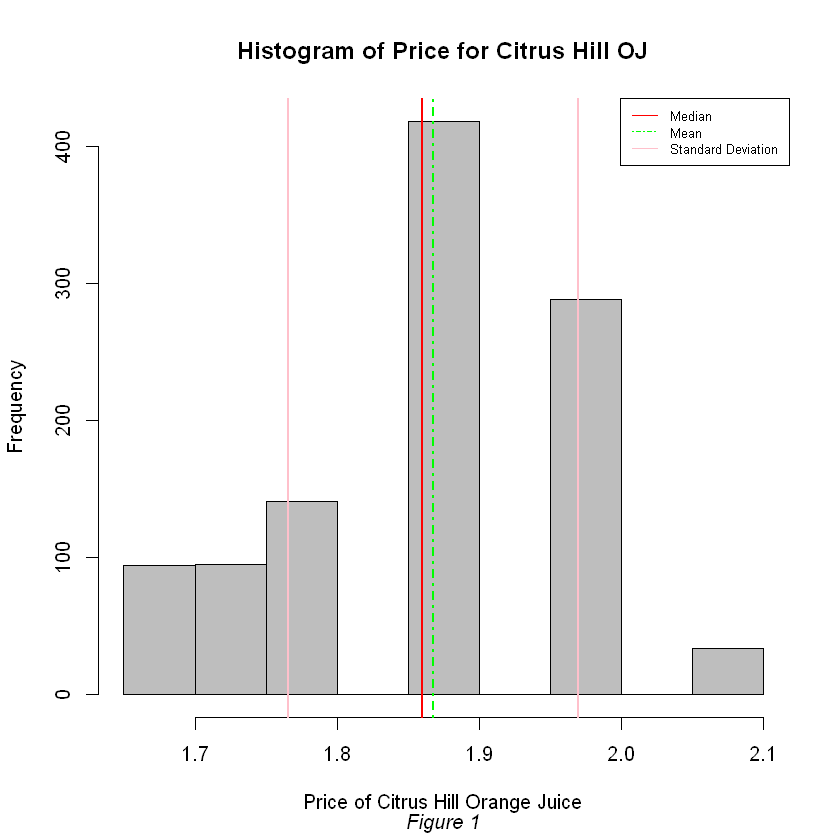

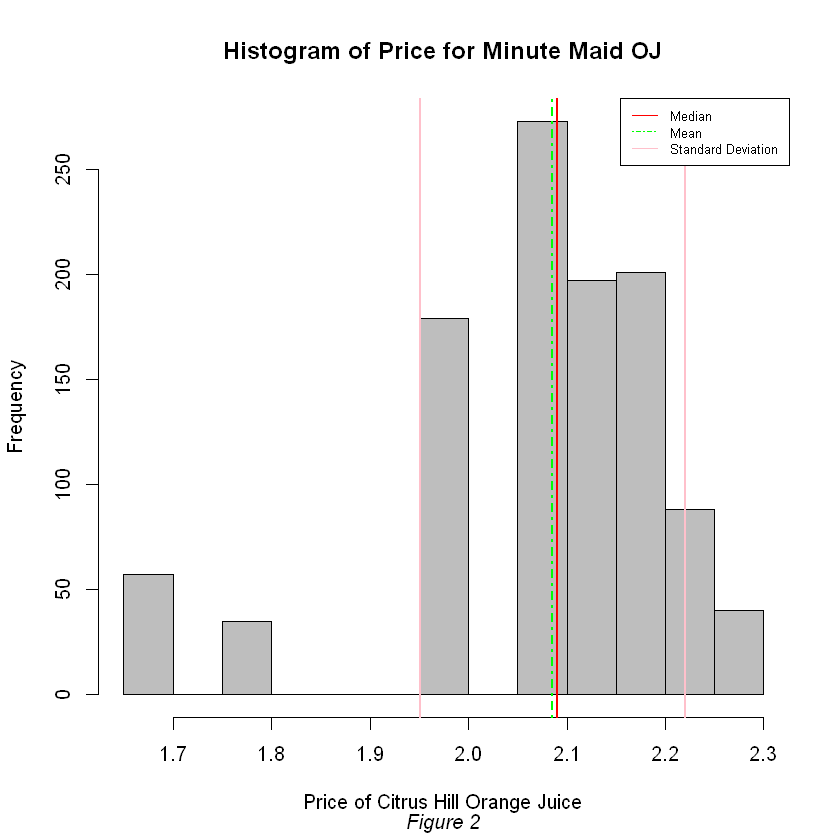

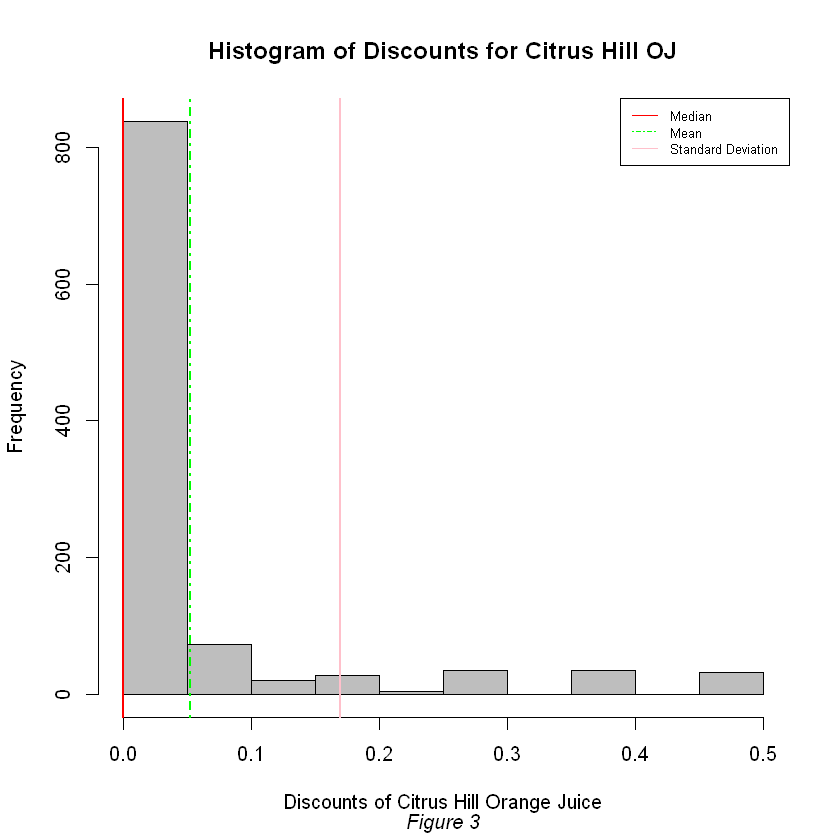

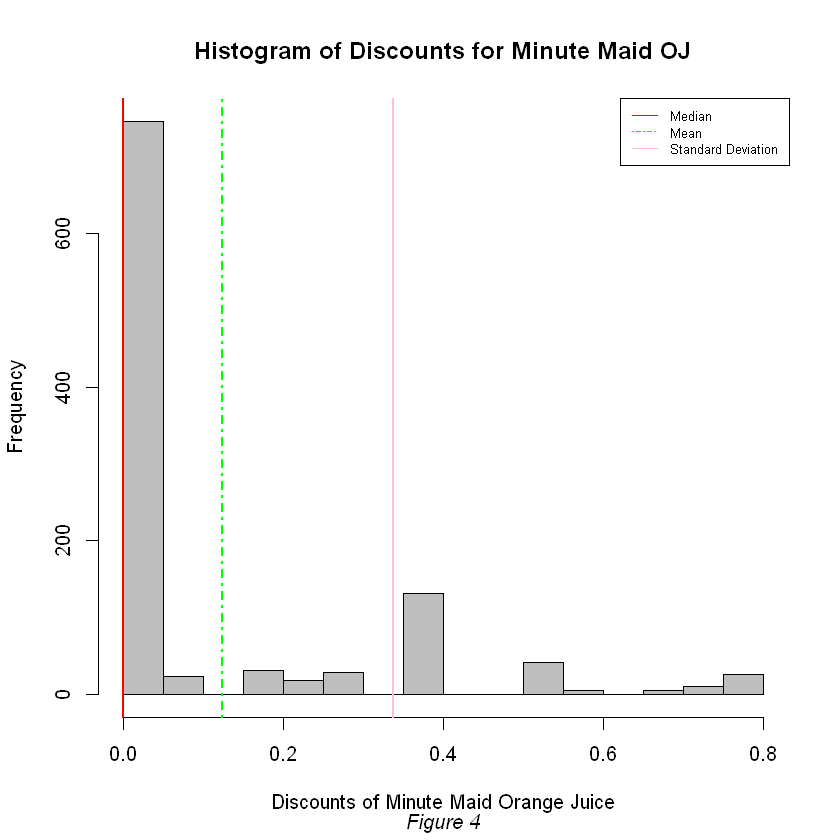

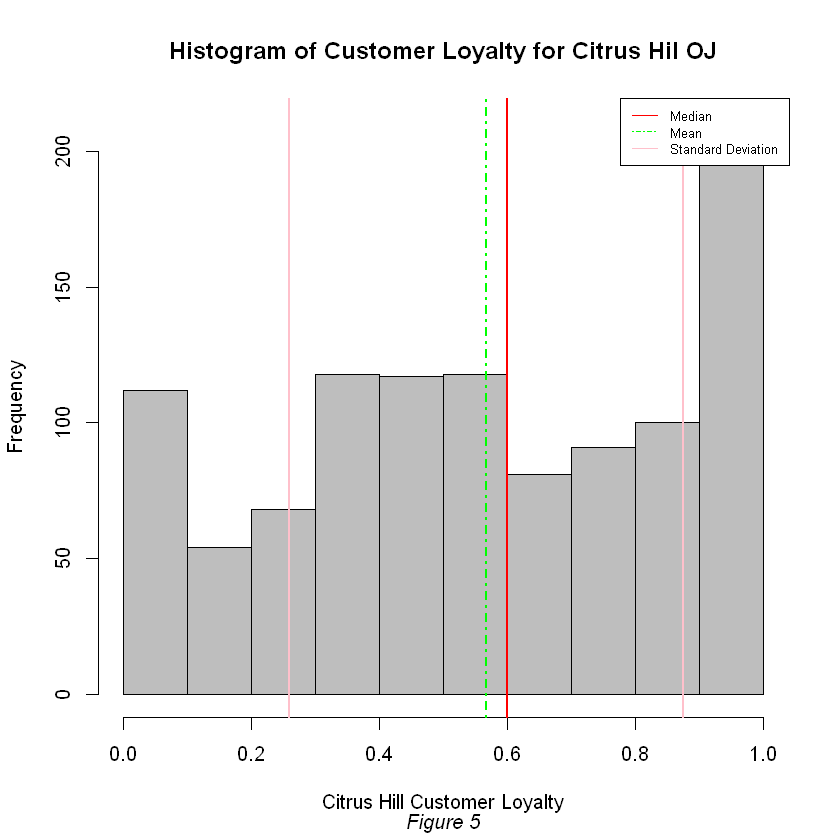

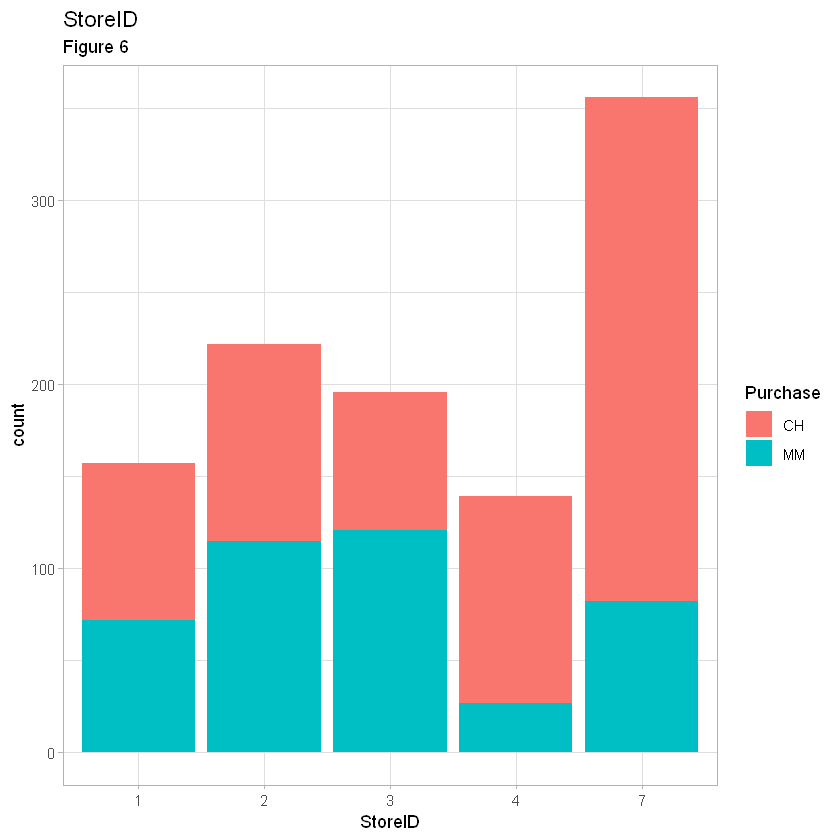

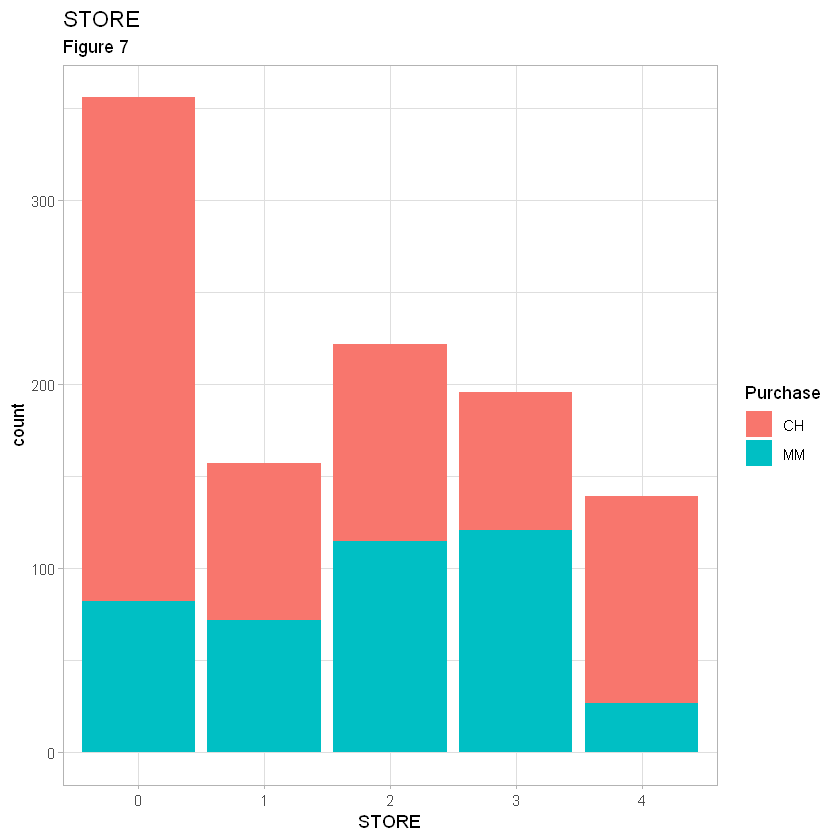

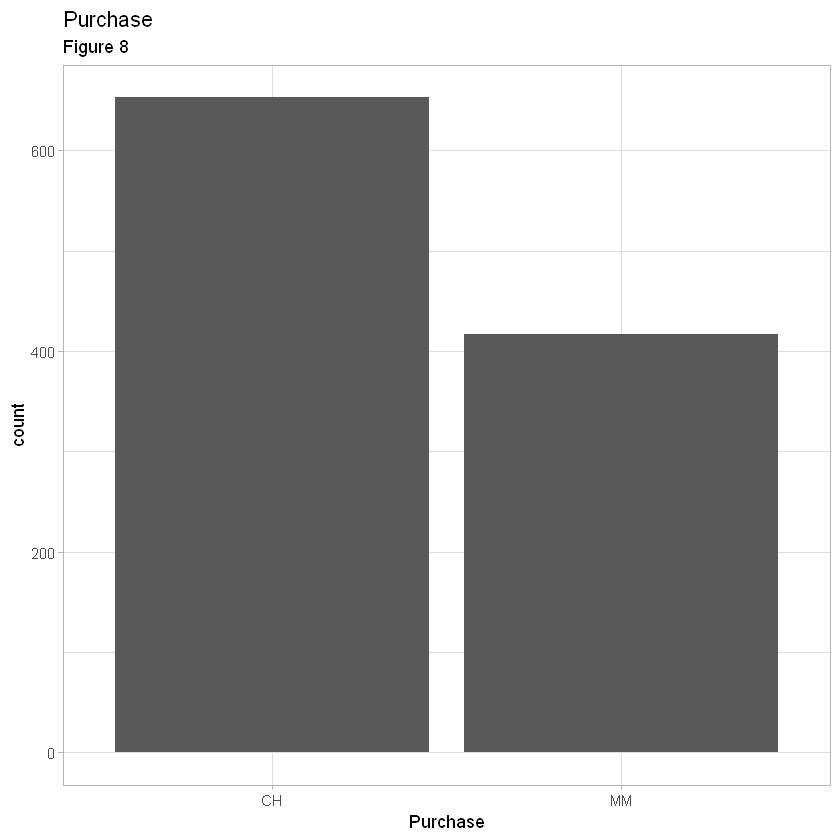

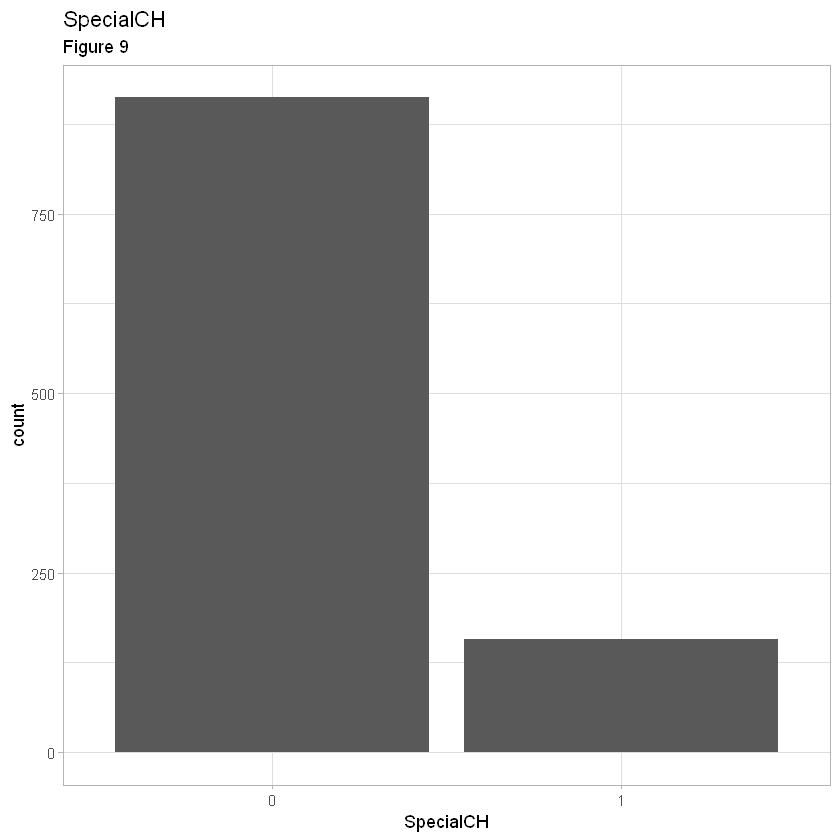

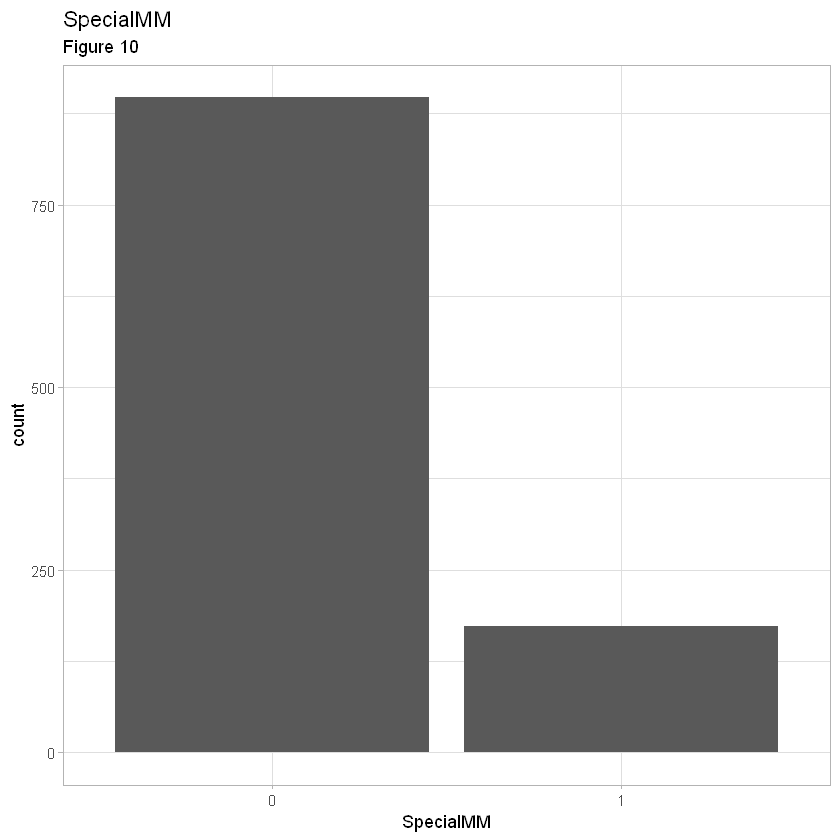

In [4]:
#########################################################################
# Data Exploration - Summaries
#########################################################################
## load relevant libraries
suppressPackageStartupMessages(library(tidyverse, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(ggfortify, warn.conflicts=FALSE))

## set theme for ggplots
theme_set(theme_light())

## numerical summary of the data
summary(data)
table(Brand=data$Purchase, Store=data$StoreID)
table(Brand=data$Purchase, SpecialCH=data$SpecialCH)
table(Brand=data$Purchase, SpecialMM=data$SpecialMM)

## graphical summaries of the data
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(1,1))

# histogram of PriceCH
hist(data$PriceCH, main="Histogram of Price for Citrus Hill OJ", 
     sub=expression(paste(italic("Figure 1"))),
     xlab="Price of Citrus Hill Orange Juice", col="grey")
abline(v=median(data$PriceCH), col='red', lty='solid', lwd=2)
abline(v=mean(data$PriceCH), col='green', lty='dotdash', lwd=2)
abline(v=mean(data$PriceCH)+sd(data$PriceCH), col='pink', lty='solid', lwd=1.75)
abline(v=mean(data$PriceCH)-sd(data$PriceCH), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

# histogram of PriceMM
hist(data$PriceMM, main="Histogram of Price for Minute Maid OJ",
     sub=expression(paste(italic("Figure 2"))),
     xlab="Price of Citrus Hill Orange Juice", col="grey")
abline(v=median(data$PriceMM), col='red', lty='solid', lwd=2)
abline(v=mean(data$PriceMM), col='green', lty='dotdash', lwd=2)
abline(v=mean(data$PriceMM)+sd(data$PriceMM), col='pink', lty='solid', lwd=1.75)
abline(v=mean(data$PriceMM)-sd(data$PriceMM), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

# histogram of citrus hill discounts
hist(data$DiscCH, main="Histogram of Discounts for Citrus Hill OJ",
     sub=expression(paste(italic("Figure 3"))),
     xlab="Discounts of Citrus Hill Orange Juice", col="grey")
abline(v=median(data$DiscCH), col='red', lty='solid', lwd=2)
abline(v=mean(data$DiscCH), col='green', lty='dotdash', lwd=2)
abline(v=mean(data$DiscCH)+sd(data$DiscCH), col='pink', lty='solid', lwd=1.75)
abline(v=mean(data$DiscCH)-sd(data$DiscCH), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

# histogram of minute maid discounts
hist(data$DiscMM, main="Histogram of Discounts for Minute Maid OJ",
     sub=expression(paste(italic("Figure 4"))),
     xlab="Discounts of Minute Maid Orange Juice", col="grey")
abline(v=median(data$DiscMM), col='red', lty='solid', lwd=2)
abline(v=mean(data$DiscMM), col='green', lty='dotdash', lwd=2)
abline(v=mean(data$DiscMM)+sd(data$DiscMM), col='pink', lty='solid', lwd=1.75)
abline(v=mean(data$DiscMM)-sd(data$DiscMM), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

# histogram of citrus hill customer loyalty
hist(data$LoyalCH, main="Histogram of Customer Loyalty for Citrus Hil OJ",
     sub=expression(paste(italic("Figure 5"))),
     xlab="Citrus Hill Customer Loyalty", col="grey")
abline(v=median(data$LoyalCH), col='red', lty='solid', lwd=2)
abline(v=mean(data$LoyalCH), col='green', lty='dotdash', lwd=2)
abline(v=mean(data$LoyalCH)+sd(data$LoyalCH), col='pink', lty='solid', lwd=1.75)
abline(v=mean(data$LoyalCH)-sd(data$LoyalCH), col='pink', lty='solid', lwd=1.75)
legend("topright",legend=c("Median", "Mean", "Standard Deviation"),
       col=c("red", "green", 'pink'),
       lty=c('solid', 'dotdash', 'solid'),
       cex=0.65)

# barplot of StoreID
ggplot(data) + 
    geom_bar(aes(x = StoreID, fill=Purchase)) +
    labs(title = "StoreID", subtitle = "Figure 6")

# barplot of STORE
ggplot(data) + 
    geom_bar(aes(x = STORE, fill=Purchase)) +
    labs(title = "STORE", subtitle = "Figure 7")

# barplot of PURCHASE
ggplot(data) + 
    geom_bar(aes(x = Purchase)) +
    labs(title = "Purchase", subtitle = "Figure 8")

# barplot of SpecialCH
ggplot(data) + 
    geom_bar(aes(x = SpecialCH)) +
    labs(title = "SpecialCH", subtitle = "Figure 9")

# barplot of SpecialMM
ggplot(data) + 
    geom_bar(aes(x = SpecialMM)) +
    labs(title = "SpecialMM", subtitle = "Figure 10")

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9789 1.6855 1.6479 1.1513 0.97022 0.50851 0.03669
Proportion of Variance 0.3263 0.2367 0.2263 0.1105 0.07844 0.02155 0.00011
Cumulative Proportion  0.3263 0.5631 0.7894 0.8998 0.97827 0.99982 0.99993
                           PC8       PC9      PC10      PC11      PC12
Standard deviation     0.02953 6.469e-16 4.178e-16 3.119e-16 1.443e-16
Proportion of Variance 0.00007 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000e+00 1.000e+00 1.000e+00 1.000e+00

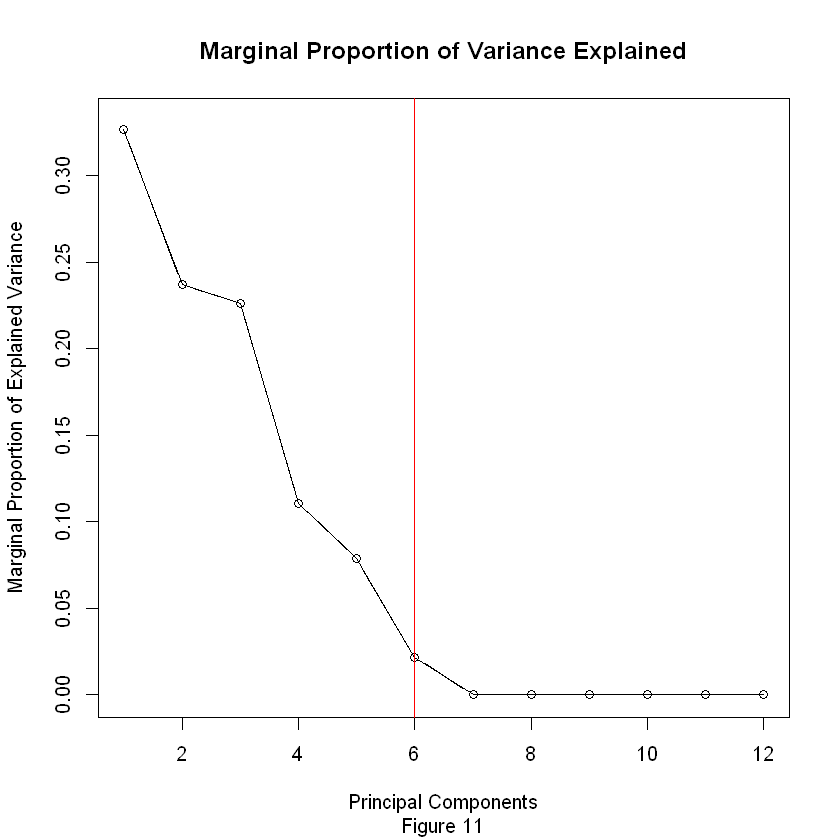

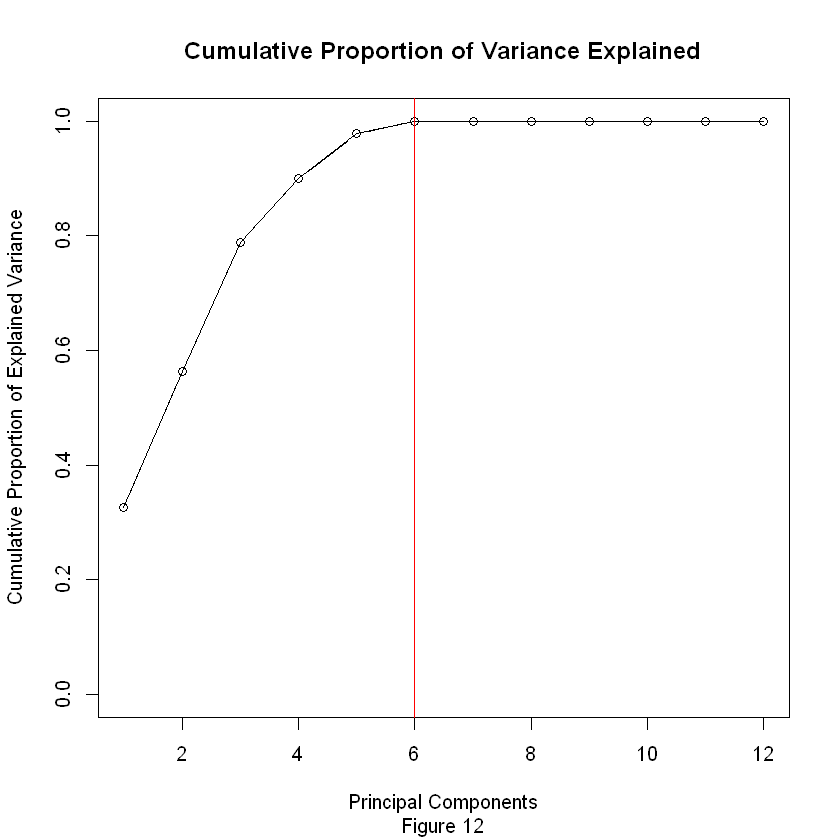

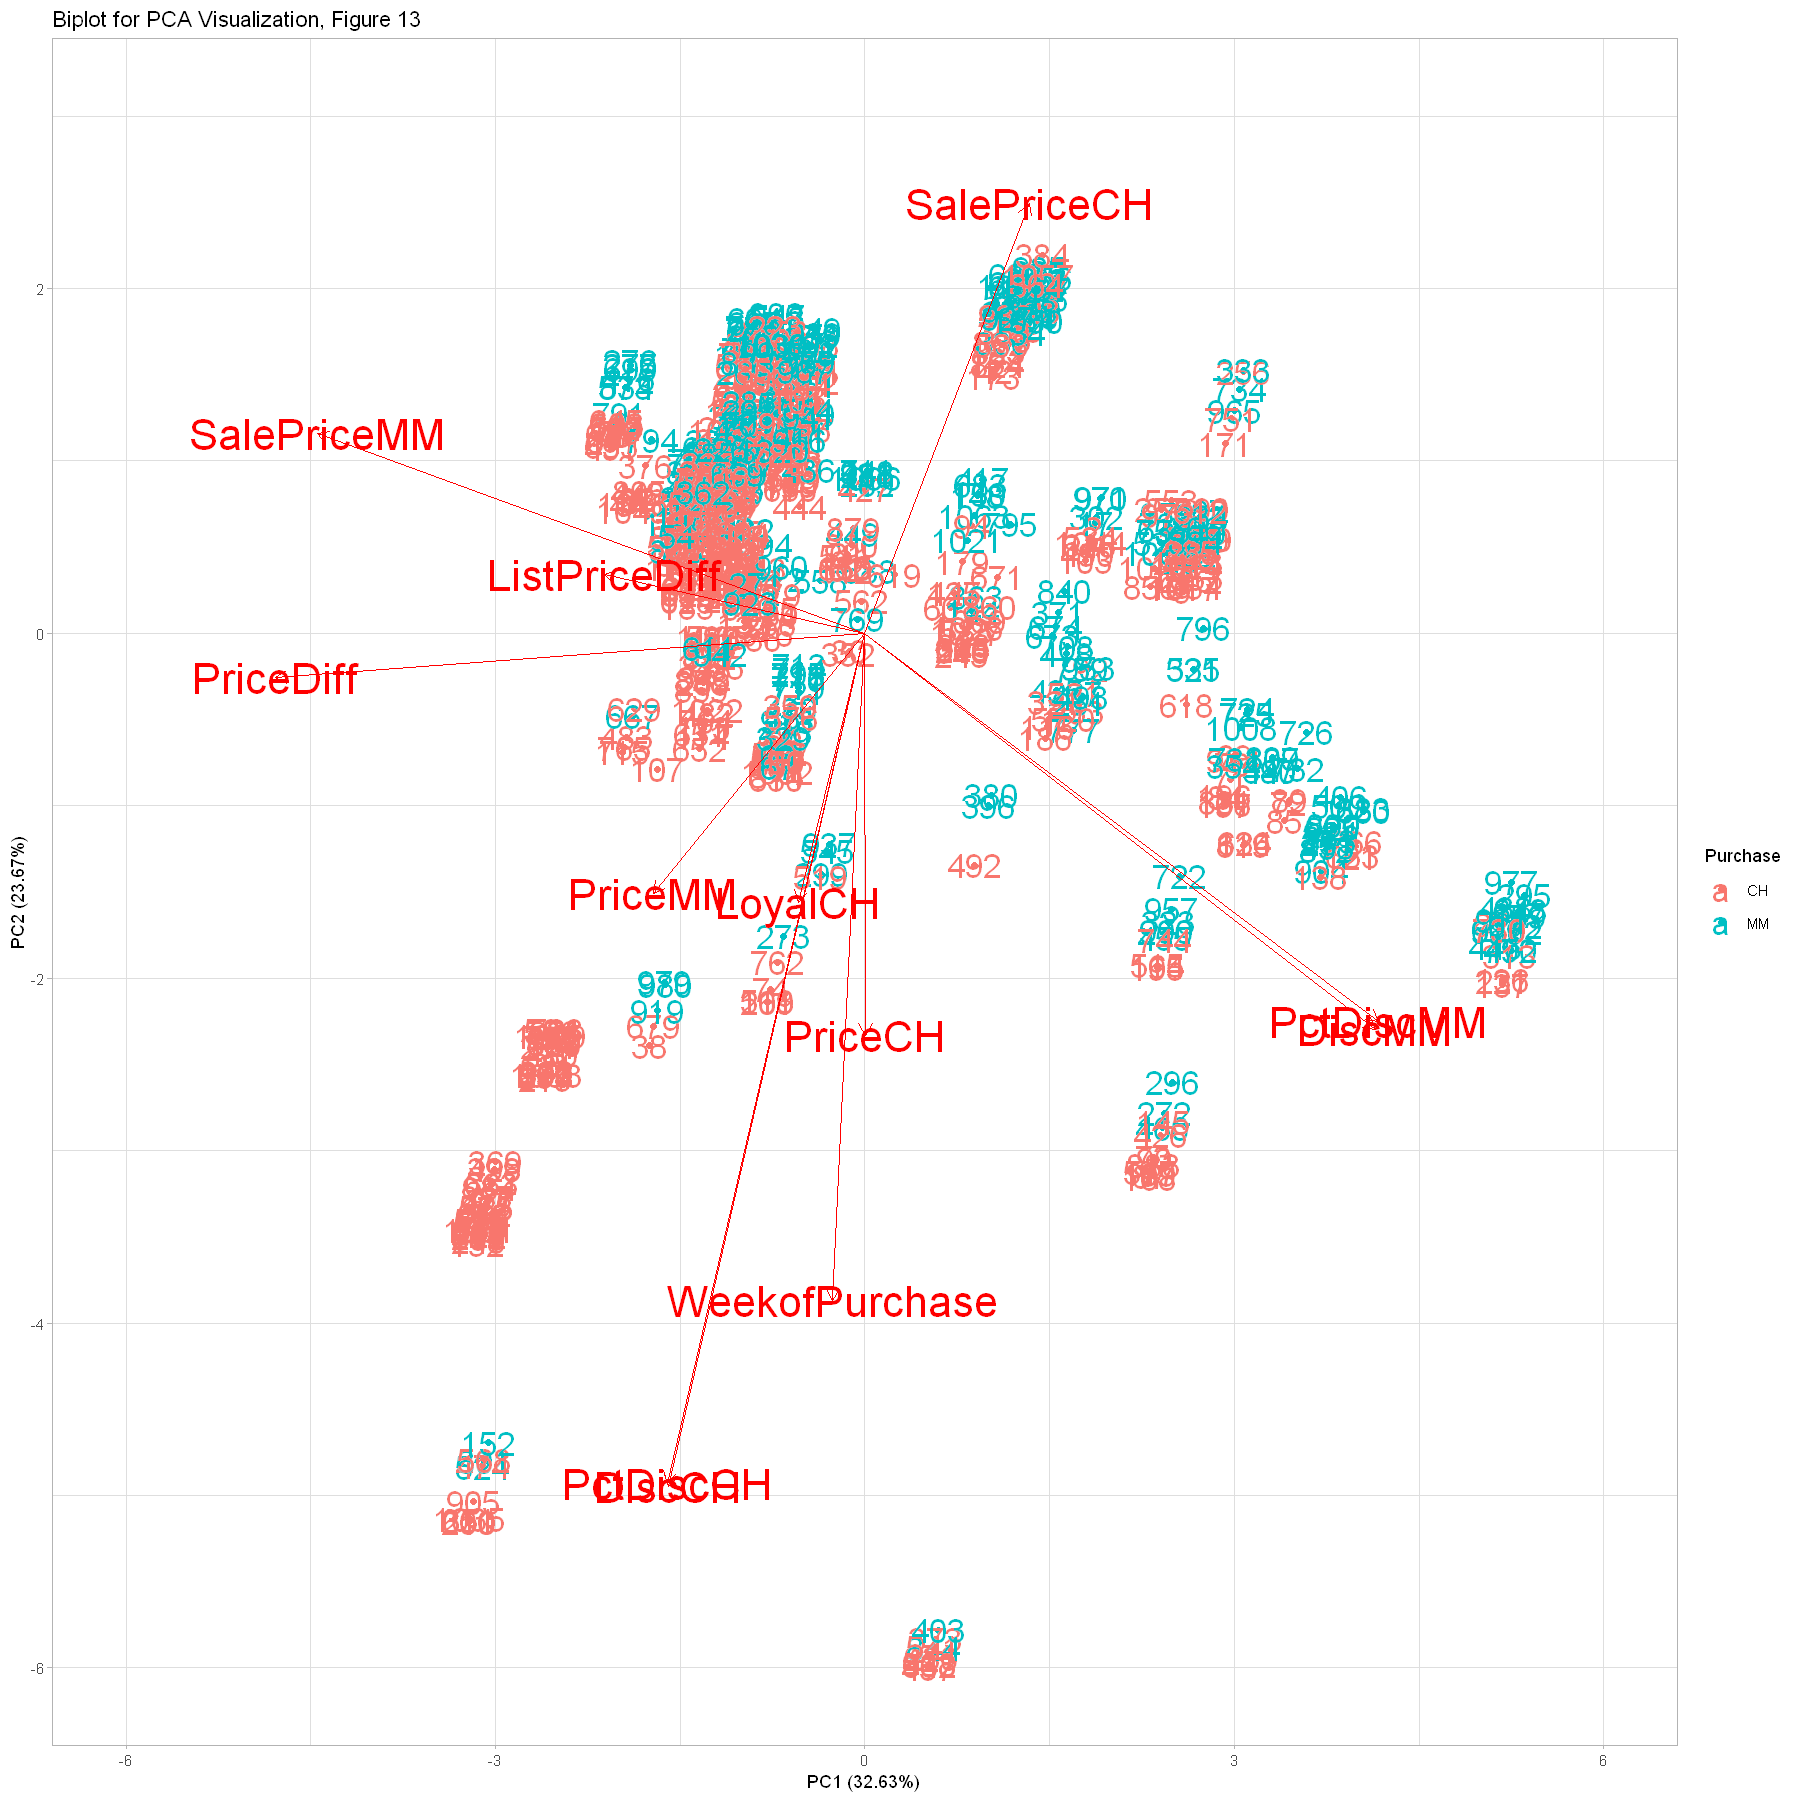

In [6]:
###################################################################
# Data Exploration: PCA
###################################################################
## sSet seed for reproducibility
set.seed(123321)

## load relevant libraries
suppressPackageStartupMessages(library(MASS, warn.conflicts=FALSE))
options(repr.plot.width=7, repr.plot.height=7)

## Perform PCA on the survey items
scaled.data <- scale(train.data[ ,numeric_cols], center=TRUE)
pca.output <- prcomp(scaled.data, scale=FALSE)
scaled.data.test <- scale(test.data[numeric_cols], center=TRUE)
pca.output.test <- (predict(pca.output, scaled.data.test))
summary(pca.output)

# find out the proportion of variance explained and the cumulative sum
pca.var.explained <- pca.output$sdev^2
pca.prop.var.explained <- pca.var.explained/(sum(pca.var.explained))

# plot the proportion of variance explained by each principal component
plot((pca.prop.var.explained),
     main="Marginal Proportion of Variance Explained",
     sub="Figure 11",
     xlab="Principal Components",
     ylab="Marginal Proportion of Explained Variance",
     ylim=(c(0, max(pca.prop.var.explained)+0.005)),
     type='b')
lines(pca.prop.var.explained)
abline(v=6, col='red')

# plot the cumulative proportion of variance explained by each principal component
plot(cumsum(pca.prop.var.explained),
     main="Cumulative Proportion of Variance Explained",
     sub="Figure 12",
     xlab="Principal Components",
     ylab="Cumulative Proportion of Explained Variance",
     ylim=c(0,1),
     type='b')
lines(cumsum(pca.prop.var.explained))
abline(v=6, col='red')

## Plot Biplot
library(ggfortify)
options(repr.plot.width=15, repr.plot.height=15)
options(warn=-1)
autoplot(prcomp(scaled.data, scale=FALSE), data = train.data, colour='Purchase',
         label = TRUE, label.size = 7, loadings=TRUE,
         loadings.label = TRUE, loadings.label.size = 9, scale=0,
         xlim=c(-6,6), ylim=c(-6,3),
         main="Biplot for PCA Visualization, Figure 13")

options(warn=0)

In [7]:
############################################################################
# Data Exploration: Feature Engineering
############################################################################
## create new features
data$SpecialsInteraction <- with(data,interaction(SpecialCH, SpecialMM))
data$DiscDiff <- scale(data$DiscMM - data$DiscCH,
                       center=TRUE)
data$PctDiscDiff <- scale(data$PctDiscMM - data$PctDiscCH,
                          center=TRUE)

train.data$SpecialsInteraction <- with(train.data,interaction(SpecialCH, SpecialMM))
train.data$DiscDiff <- scale(train.data$DiscMM - train.data$DiscCH,
                             center=TRUE)
train.data$PctDiscDiff <- scale(train.data$PctDiscMM - train.data$PctDiscCH,
                                center=TRUE)

test.data$SpecialsInteraction <- with(test.data,interaction(SpecialCH, SpecialMM))
test.data$DiscDiff <- scale(test.data$DiscMM - test.data$DiscCH,
                            center=TRUE)
test.data$PctDiscDiff <- scale(test.data$PctDiscMM - test.data$PctDiscCH,
                               center=TRUE)

pca.train.data <- data.frame(pca.output$x)
pca.train.data$Purchase <- train.data$Purchase
pca.test.data <- data.frame(pca.output.test)
pca.test.data$Purchase <- test.data$Purchase

pca.train.data$SpecialsInteraction <- with(train.data,interaction(SpecialCH, SpecialMM))
pca.train.data$DiscDiff <- scale(train.data$DiscMM - train.data$DiscCH,
                            center=TRUE)
pca.train.data$PctDiscDiff <- (train.data$PctDiscMM - train.data$PctDiscCH)

pca.test.data$SpecialsInteraction <- with(test.data,interaction(SpecialCH, SpecialMM))
pca.test.data$DiscDiff <- scale(test.data$DiscMM - test.data$DiscCH,
                           center=TRUE)
pca.test.data$PctDiscDiff <- scale(test.data$PctDiscMM - test.data$PctDiscCH,
                                   center=TRUE)

Warning message:
"package 'e1071' was built under R version 3.5.3"


Call:
svm(formula = Purchase ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + SpecialsInteraction + 
    DiscDiff, data = pca.train.data, kernel = "linear", cost = 0.01, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 
      gamma:  0.09090909 

Number of Support Vectors:  438

 ( 220 218 )


Number of Classes:  2 

Levels: 
 CH MM




      Training Prediction
Actual  CH  MM
    CH 440  58
    MM  77 225

      Test Prediction
Actual  CH  MM
    CH 123  32
    MM  22  93


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
  cost
 0.041

- best performance: 0.1675 

- Detailed performance results:
     cost   error dispersion
1   0.010 0.17125 0.02285978
2   0.011 0.17125 0.02285978
3   0.013 0.16875 0.02651650
4   0.015 0.17125 0.02638523
5   0.021 0.17250 0.02813657
6   0.041 0.16750 0.02648375
7   0.080 0.16875 0.02517301
8   0.100 0.16875 0.02517301
9   0.200 0.17250 0.02622022
10  0.300 0.17000 0.02713137
11  0.400 0.17000 0.02713137
12  0.500 0.17000 0.02713137
13  0.700 0.17000 0.02713137
14  0.800 0.17000 0.02713137
15  0.900 0.17000 0.02713137
16  1.500 0.17000 0.02713137
17  2.750 0.16875 0.02716334
18  3.875 0.16875 0.02716334
19  4.900 0.17000 0.02713137
20  5.910 0.17000 0.02713137
21  6.920 0.17000 0.02713137
22  7.950 0.17000 0.02713137
23  8.960 0.17000 0.02713137
24  9.980 0.17000 0.02713137
25 10.000 0.17000 0.02713137


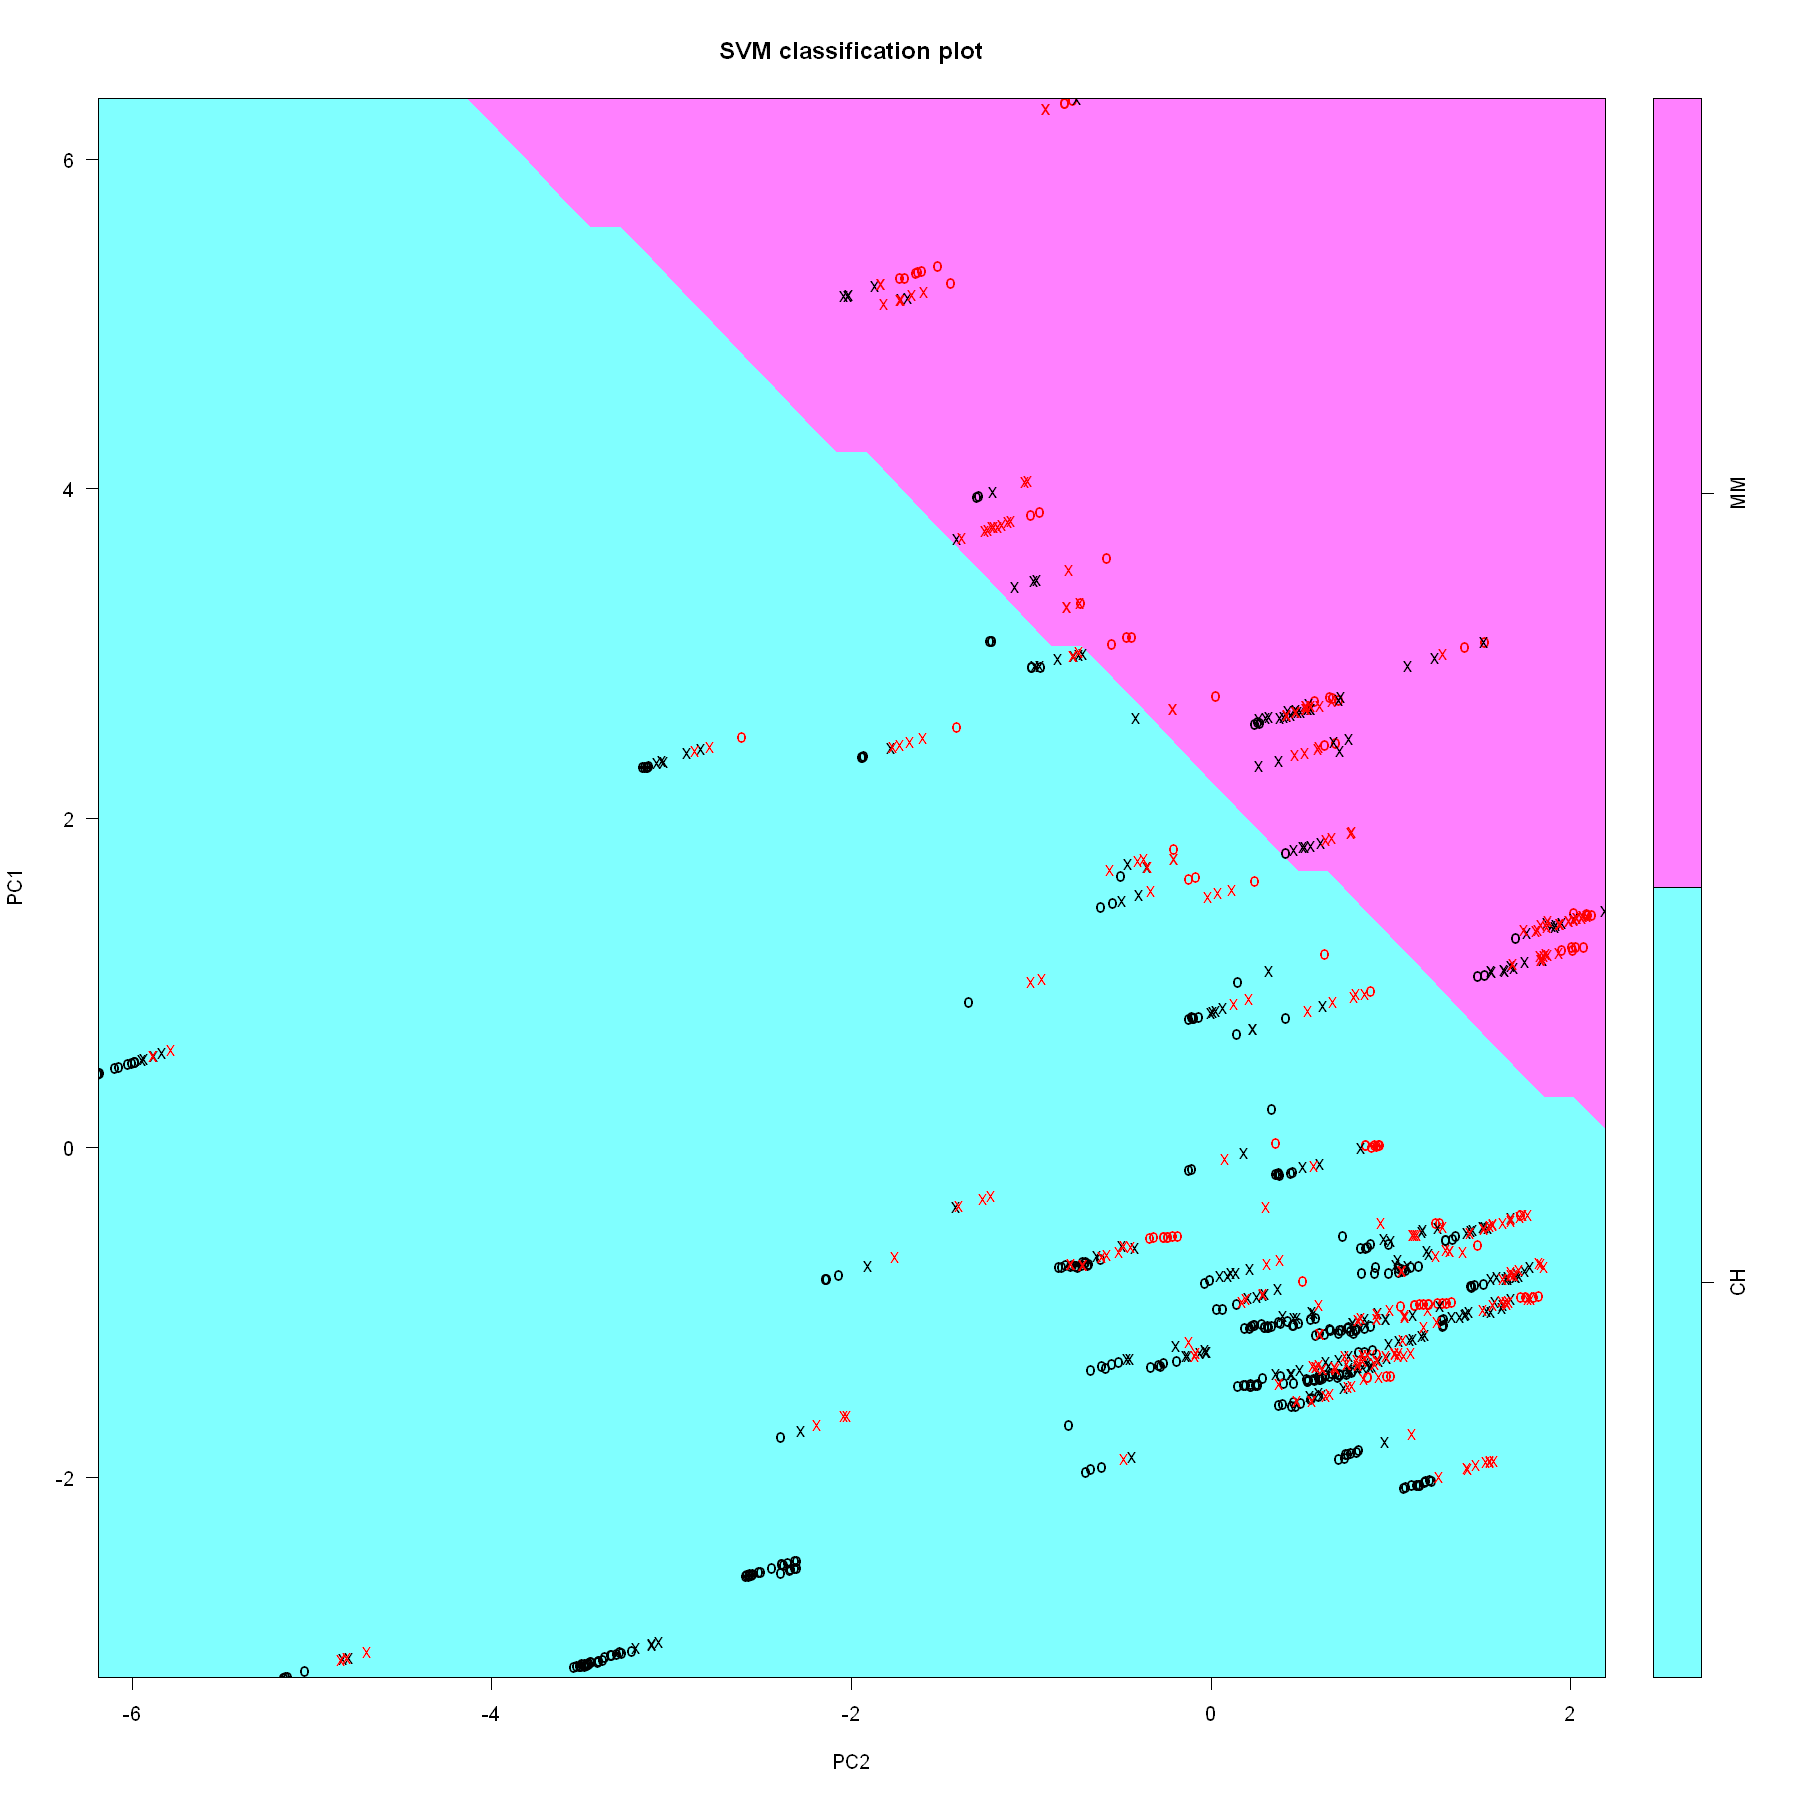

      Training Prediction
Actual  CH  MM
    CH 436  62
    MM  70 232

      Test Prediction
Actual  CH  MM
    CH 120  35
    MM  24  91

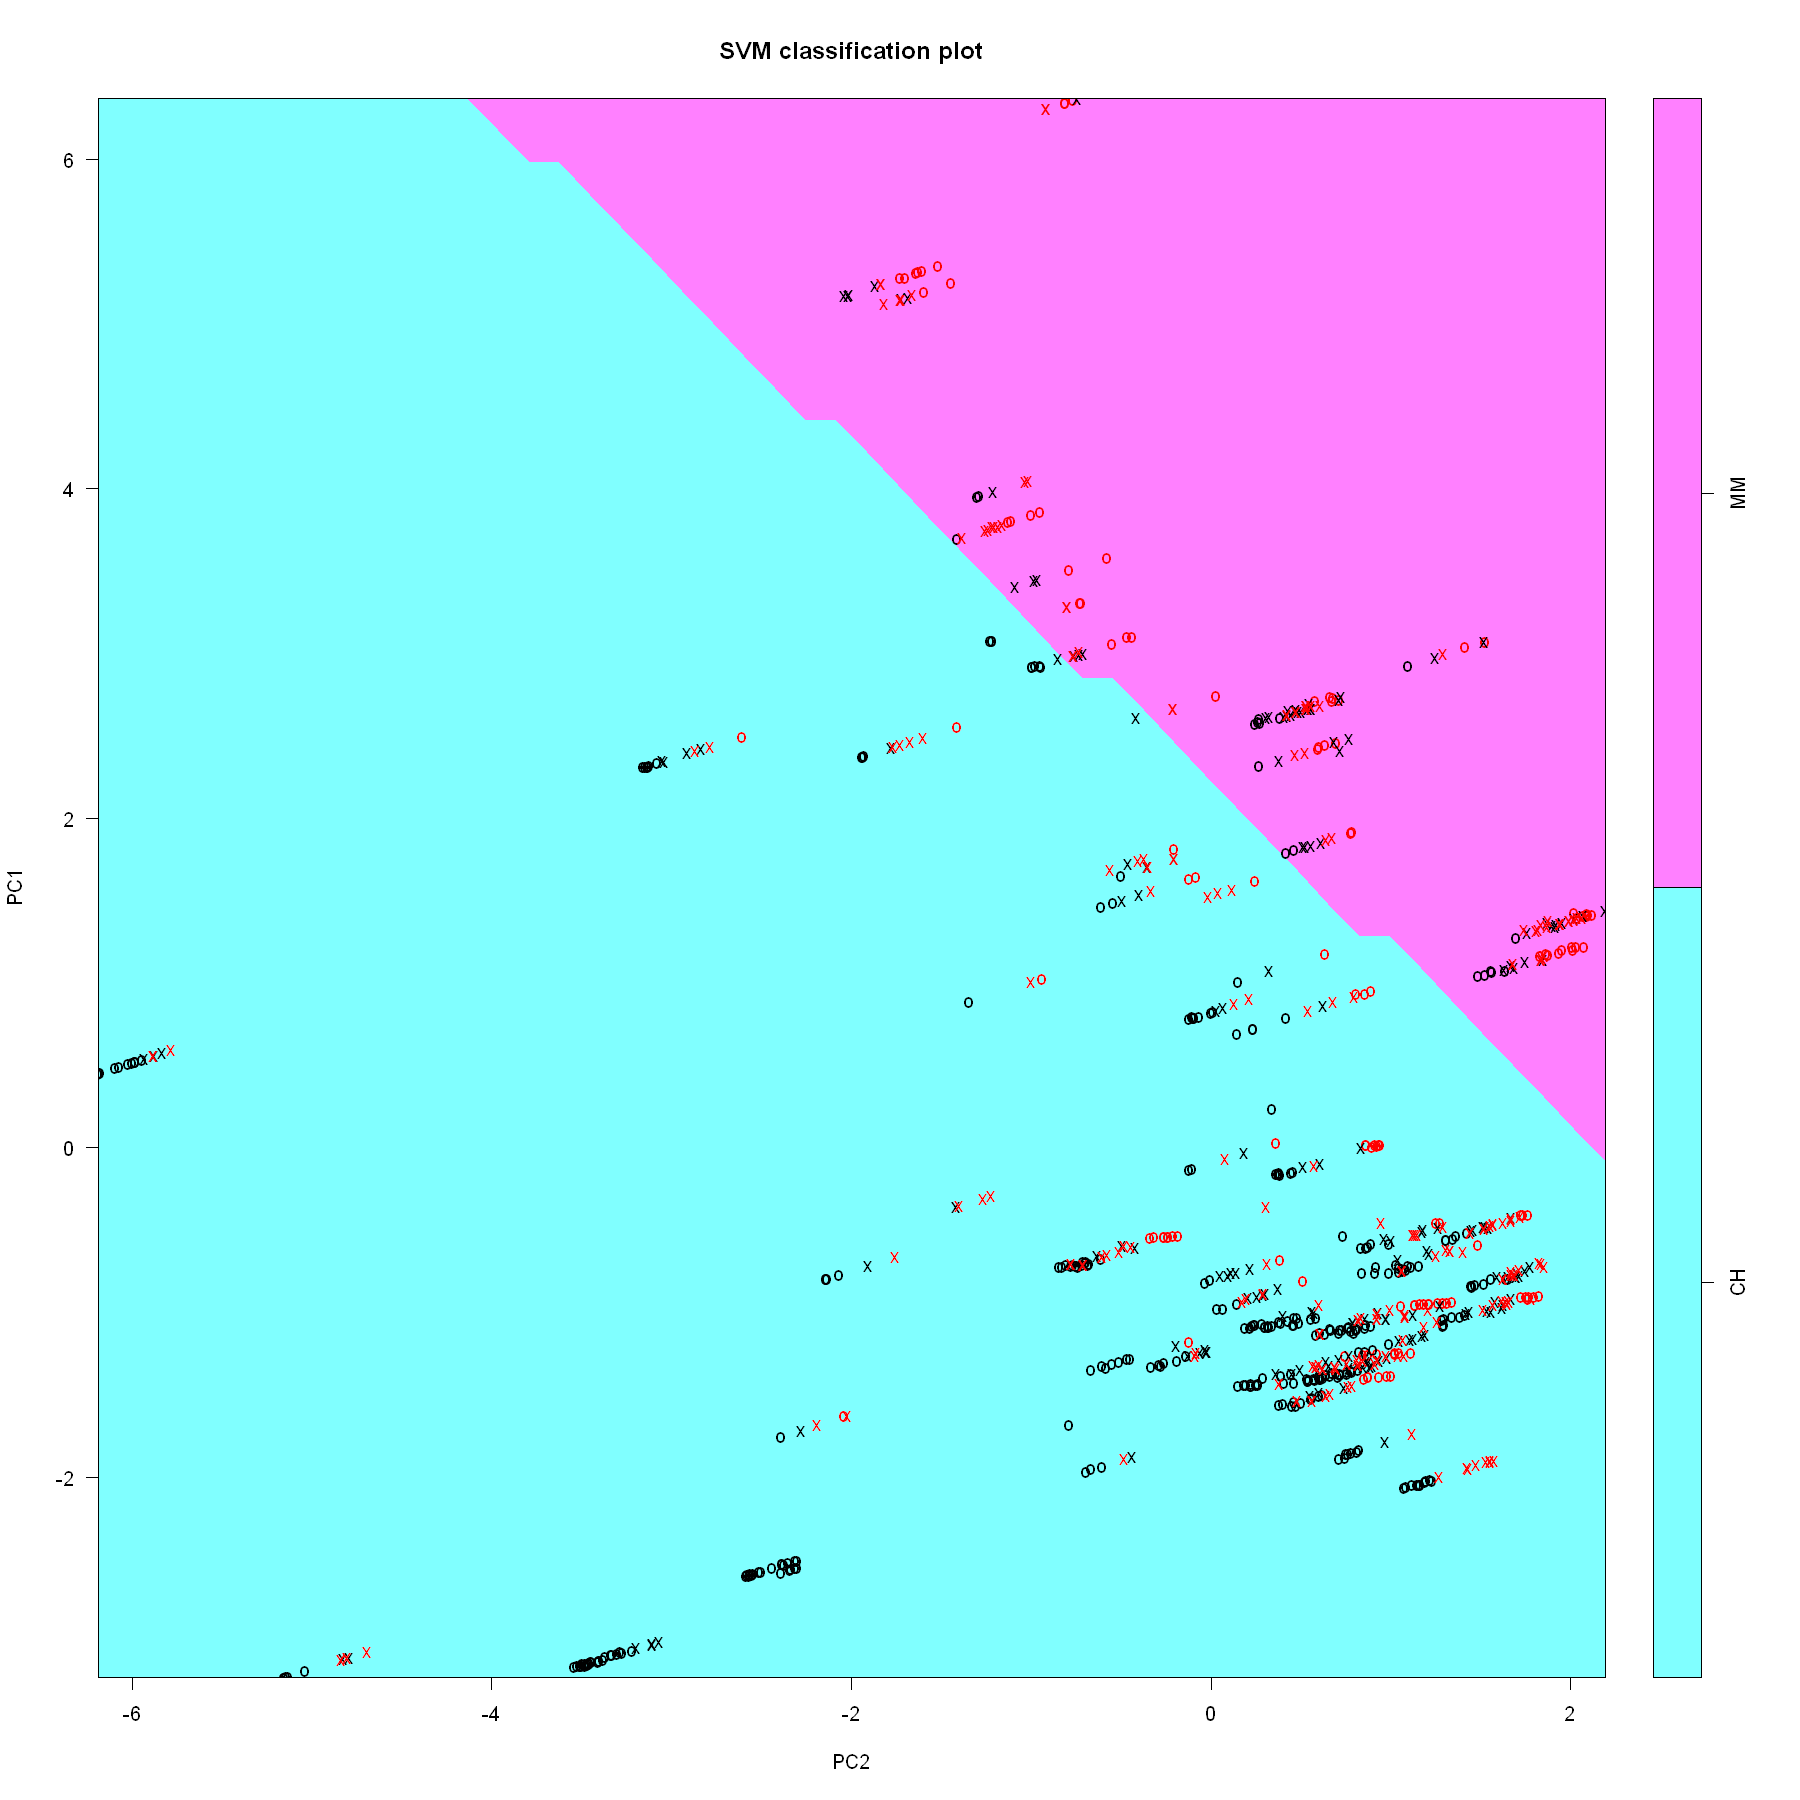

In [8]:
####################################################################### 
# Data Modeling: Support Vector Classifier
#######################################################################
## set seed for reproducibility
set.seed(123456)

## load relevant libraries
suppressPackageStartupMessages(library(e1071, warn.conflicts=FALSE))

## fit the initial support vector classifier
svm.model <- svm(Purchase ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 +
                 SpecialsInteraction + DiscDiff,
                 data=pca.train.data, kernel="linear",
                 cost=0.01, scale=FALSE)
summary(svm.model)
plot(svm.model, pca.train.data, formula=PC1 ~ PC2)
(train.table <- table("Actual"=pca.train.data$Purchase,
                     "Training Prediction"=svm.model$fitted))

preds <- predict(svm.model, pca.test.data)
(test.table <- table("Actual"=pca.test.data$Purchase,
                     "Test Prediction"=preds))

## fit the tuned support vector classifier
tune.out=tune(svm, Purchase ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 +
              SpecialsInteraction + DiscDiff,
              data=pca.train.data, kernel="linear", scale=FALSE,
              ranges=list(cost=c(0.01, 0.011, 0.013, 0.015, 0.021, 0.041,
                                 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7,
                                 0.8, 0.9, 1.5, 2.75, 3.875, 4.9,
                                 5.91, 6.92, 7.95,8.96, 9.98, 10)))
summary(tune.out)
plot(tune.out$best.model, pca.train.data, formula=PC1 ~ PC2)
(table("Actual"=pca.train.data$Purchase,
      "Training Prediction"=tune.out$best.model$fitted))
(table("Actual"=pca.test.data$Purchase,
      "Test Prediction"=predict(tune.out$best.model,
                                pca.test.data)))

In [9]:
####################################################################### 
# Data Modeling: Support Vector Machine - Radial Kernel
#######################################################################
## set seed for reproducibility
set.seed(123456)

## fit the initial support vector classifier
svm.model.radial <- svm(Purchase ~ SalePriceCH + SalePriceMM +
                        PriceDiff + PctDiscMM + PctDiscCH +
                        WeekofPurchase + LoyalCH,
                 data=train.data, kernel="radial",
                 cost=0.01, scale=TRUE)
summary(svm.model.radial)
(train.table <- table("Actual"=train.data$Purchase,
                     "Training Prediction"=svm.model.radial$fitted))

preds <- predict(svm.model.radial, test.data)
(test.table <- table("Actual"=test.data$Purchase,
                     "Test Prediction"=preds))

## fit the tuned support vector classifier
tune.out.radial=tune(svm, Purchase ~ SalePriceCH + SalePriceMM +
                        PriceDiff + PctDiscMM + PctDiscCH +
                        WeekofPurchase + LoyalCH,
              data=train.data, kernel="radial", scale=TRUE,
              ranges=list(cost=c(0.01, 0.5, 0.9,
                         2.575, 4.9, 5.5,
                         7.95, 8.96, 10)))
summary(tune.out.radial)
(table("Actual"=train.data$Purchase,
      "Training Prediction"=tune.out.radial$best.model$fitted))
(table("Actual"=test.data$Purchase,
      "Test Prediction"=predict(tune.out.radial$best.model,
                                test.data)))


Call:
svm(formula = Purchase ~ SalePriceCH + SalePriceMM + PriceDiff + 
    PctDiscMM + PctDiscCH + WeekofPurchase + LoyalCH, data = train.data, 
    kernel = "radial", cost = 0.01, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 
      gamma:  0.1428571 

Number of Support Vectors:  606

 ( 304 302 )


Number of Classes:  2 

Levels: 
 CH MM




      Training Prediction
Actual  CH  MM
    CH 498   0
    MM 302   0

      Test Prediction
Actual  CH  MM
    CH 155   0
    MM 115   0


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.5

- best performance: 0.165 

- Detailed performance results:
    cost   error dispersion
1  0.010 0.37750 0.05197489
2  0.500 0.16500 0.03050501
3  0.900 0.16625 0.03007514
4  2.575 0.16750 0.03184162
5  4.900 0.16500 0.03216710
6  5.500 0.16750 0.03073181
7  7.950 0.17000 0.03184162
8  8.960 0.17000 0.03184162
9 10.000 0.17250 0.03216710


      Training Prediction
Actual  CH  MM
    CH 449  49
    MM  74 228

      Test Prediction
Actual  CH  MM
    CH 138  17
    MM  33  82

In [15]:
####################################################################### 
# Data Modeling: Support Vector Machine - Polynomial Kernel
#######################################################################
## set seed for reproducibility
set.seed(123456)

## fit the initial support vector machine
svm.model <- svm(Purchase ~ SalePriceCH + SalePriceMM +
                        PriceDiff + PctDiscMM + PctDiscCH +
                        WeekofPurchase + LoyalCH + SpecialsInteraction +
                        PctDiscDiff,
                 data=train.data, kernel="polynomial", degree=2,
                 cost=0.01, scale=TRUE)
summary(svm.model)
(train.table <- table("Actual"=train.data$Purchase,
                     "Training Prediction"=svm.model$fitted))

preds <- predict(svm.model, test.data)
(test.table <- table("Actual"=test.data$Purchase,
                     "Test Prediction"=preds))

## fit the tuned support vector machine
tune.out=tune(svm, Purchase ~ SalePriceCH + SalePriceMM +
                        PriceDiff + PctDiscMM + PctDiscCH +
                        WeekofPurchase + LoyalCH + SpecialsInteraction +
                        PctDiscDiff,
              scale=TRUE, data=train.data, kernel="polynomial",
              degree=2, ranges=list(
                  cost=c(0.01, 0.5, 2.5, 6.75, 10)))
summary(tune.out)
(table("Actual"=train.data$Purchase,
       "Training Prediction"=tune.out$best.model$fitted))
(table("Actual"=test.data$Purchase,
      "Test Prediction"=predict(tune.out$best.model,test.data)))


Call:
svm(formula = Purchase ~ SalePriceCH + SalePriceMM + PriceDiff + 
    PctDiscMM + PctDiscCH + WeekofPurchase + LoyalCH + SpecialsInteraction + 
    PctDiscDiff, data = train.data, kernel = "polynomial", degree = 2, 
    cost = 0.01, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
      gamma:  0.08333333 
     coef.0:  0 

Number of Support Vectors:  606

 ( 304 302 )


Number of Classes:  2 

Levels: 
 CH MM




      Training Prediction
Actual  CH  MM
    CH 498   0
    MM 302   0

      Test Prediction
Actual  CH  MM
    CH 155   0
    MM 115   0


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 6.75

- best performance: 0.17375 

- Detailed performance results:
   cost   error dispersion
1  0.01 0.37750 0.05197489
2  0.50 0.19500 0.03545341
3  2.50 0.18250 0.02958040
4  6.75 0.17375 0.03701070
5 10.00 0.17625 0.03653860


      Training Prediction
Actual  CH  MM
    CH 456  42
    MM  82 220

      Test Prediction
Actual  CH  MM
    CH 141  14
    MM  34  81